In [1]:
pip install meteostat

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Daily,Point
import pandas as pd
import numpy as np

start = datetime(2013, 1, 1)
end = datetime(2023, 1, 1)
#coordinates,elevation of Pune
pune= Point(18.5204,73.8567,560)

data = Daily(pune, start, end)
data = data.fetch()

df = pd.DataFrame(data)
df.to_csv("2022data.csv")


In [3]:
weather=df[["tmax","tmin","tavg","prcp","wdir","wspd","pres"]]
weather

,tmax,tmin,tavg,prcp,wdir,wspd,pres
time,,,,,,,
2013-01-01,32.6,NaN,24.5,NaN,NaN,NaN,NaN
2013-01-02,32.8,16.1,23.1,NaN,NaN,NaN,NaN
2013-01-03,32.2,14.4,21.8,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,20.3,NaN,NaN,NaN,NaN
2013-01-05,30.2,7.6,19.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-28,30.0,17.1,23.0,0.0,40.0,4.6,1016.3
2022-12-29,29.5,16.7,22.7,0.0,260.0,4.5,1017.5
2022-12-30,29.6,17.3,22.8,0.0,16.0,4.8,1018.5


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2013-01-01 to 2023-01-01
Freq: D
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmax    1800 non-null   float64
 1   tmin    3010 non-null   float64
 2   tavg    3651 non-null   float64
 3   prcp    1668 non-null   float64
 4   wdir    728 non-null    float64
 5   wspd    728 non-null    float64
 6   pres    728 non-null    float64
dtypes: float64(7)
memory usage: 228.3 KB


In [5]:
#Renamed the columns
weather.columns=["Max_Temp","Min_Temp","Avg_Temp","Prcp","Wnd_Dir","Wind_Speed","Pressure"]
weather

,Max_Temp,Min_Temp,Avg_Temp,Prcp,Wnd_Dir,Wind_Speed,Pressure
time,,,,,,,
2013-01-01,32.6,NaN,24.5,NaN,NaN,NaN,NaN
2013-01-02,32.8,16.1,23.1,NaN,NaN,NaN,NaN
2013-01-03,32.2,14.4,21.8,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,20.3,NaN,NaN,NaN,NaN
2013-01-05,30.2,7.6,19.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-28,30.0,17.1,23.0,0.0,40.0,4.6,1016.3
2022-12-29,29.5,16.7,22.7,0.0,260.0,4.5,1017.5
2022-12-30,29.6,17.3,22.8,0.0,16.0,4.8,1018.5


In [6]:
#Calculated the null values
weather.apply(pd.isnull).sum()/weather.shape[0]


Max_Temp      0.507254
Min_Temp      0.176020
Avg_Temp      0.000547
Prcp          0.543389
Wnd_Dir       0.800712
Wind_Speed    0.800712
Pressure      0.800712
dtype: float64

In [7]:
weather=weather.fillna(weather.mean())

In [8]:
weather

,Max_Temp,Min_Temp,Avg_Temp,Prcp,Wnd_Dir,Wind_Speed,Pressure
time,,,,,,,
2013-01-01,32.600000,18.599934,24.5,4.803118,208.960165,7.072115,1009.668132
2013-01-02,32.800000,16.100000,23.1,4.803118,208.960165,7.072115,1009.668132
2013-01-03,32.200000,14.400000,21.8,4.803118,208.960165,7.072115,1009.668132
2013-01-04,31.568722,18.599934,20.3,4.803118,208.960165,7.072115,1009.668132
2013-01-05,30.200000,7.600000,19.1,4.803118,208.960165,7.072115,1009.668132
...,...,...,...,...,...,...,...
2022-12-28,30.000000,17.100000,23.0,0.000000,40.000000,4.600000,1016.300000
2022-12-29,29.500000,16.700000,22.7,0.000000,260.000000,4.500000,1017.500000
2022-12-30,29.600000,17.300000,22.8,0.000000,16.000000,4.800000,1018.500000


In [9]:
weather.apply(pd.isnull).sum()/weather.shape[0]

Max_Temp      0.0
Min_Temp      0.0
Avg_Temp      0.0
Prcp          0.0
Wnd_Dir       0.0
Wind_Speed    0.0
Pressure      0.0
dtype: float64

In [10]:
weather.index= pd.to_datetime(weather.index)

In [11]:
weather.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30',
               '2022-12-31', '2023-01-01'],
              dtype='datetime64[ns]', name='time', length=3653, freq='D')

<AxesSubplot: xlabel='time'>

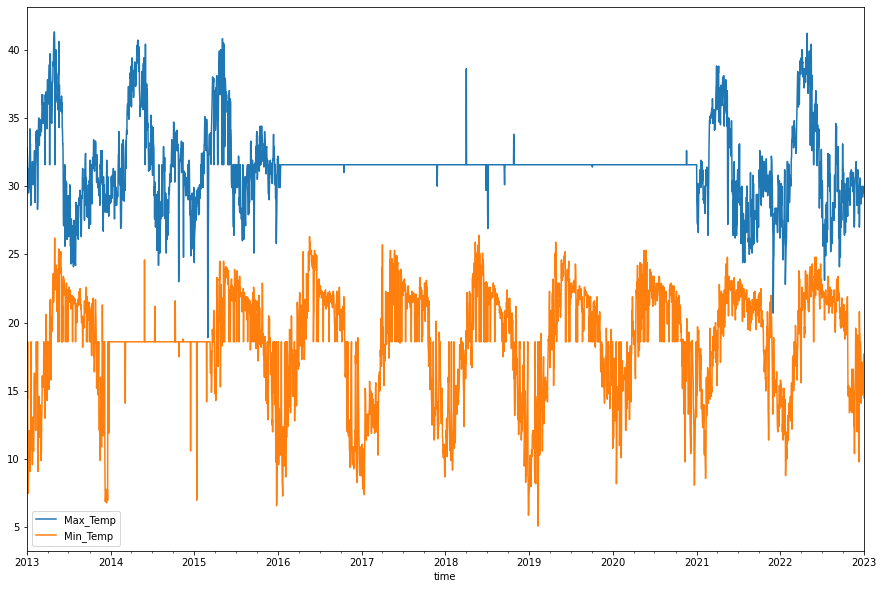

In [12]:
weather[["Max_Temp","Min_Temp"]].plot(figsize=(15,10))

In [13]:
#Set the target temperature to the max temprature of next day
weather["target"]=weather.shift(-1)["Max_Temp"]

In [14]:
weather

,Max_Temp,Min_Temp,Avg_Temp,Prcp,Wnd_Dir,Wind_Speed,Pressure,target
time,,,,,,,,
2013-01-01,32.600000,18.599934,24.5,4.803118,208.960165,7.072115,1009.668132,32.800000
2013-01-02,32.800000,16.100000,23.1,4.803118,208.960165,7.072115,1009.668132,32.200000
2013-01-03,32.200000,14.400000,21.8,4.803118,208.960165,7.072115,1009.668132,31.568722
2013-01-04,31.568722,18.599934,20.3,4.803118,208.960165,7.072115,1009.668132,30.200000
2013-01-05,30.200000,7.600000,19.1,4.803118,208.960165,7.072115,1009.668132,30.500000
...,...,...,...,...,...,...,...,...
2022-12-28,30.000000,17.100000,23.0,0.000000,40.000000,4.600000,1016.300000,29.500000
2022-12-29,29.500000,16.700000,22.7,0.000000,260.000000,4.500000,1017.500000,29.600000
2022-12-30,29.600000,17.300000,22.8,0.000000,16.000000,4.800000,1018.500000,29.700000


In [15]:
weather=weather.iloc[:-1,:].copy()

In [16]:
weather

,Max_Temp,Min_Temp,Avg_Temp,Prcp,Wnd_Dir,Wind_Speed,Pressure,target
time,,,,,,,,
2013-01-01,32.600000,18.599934,24.5,4.803118,208.960165,7.072115,1009.668132,32.800000
2013-01-02,32.800000,16.100000,23.1,4.803118,208.960165,7.072115,1009.668132,32.200000
2013-01-03,32.200000,14.400000,21.8,4.803118,208.960165,7.072115,1009.668132,31.568722
2013-01-04,31.568722,18.599934,20.3,4.803118,208.960165,7.072115,1009.668132,30.200000
2013-01-05,30.200000,7.600000,19.1,4.803118,208.960165,7.072115,1009.668132,30.500000
...,...,...,...,...,...,...,...,...
2022-12-27,29.600000,16.800000,22.8,0.000000,260.000000,4.300000,1015.300000,30.000000
2022-12-28,30.000000,17.100000,23.0,0.000000,40.000000,4.600000,1016.300000,29.500000
2022-12-29,29.500000,16.700000,22.7,0.000000,260.000000,4.500000,1017.500000,29.600000


In [17]:
predictors= ['Max_Temp','Min_Temp','Avg_Temp','Prcp','Wnd_Dir','Wind_Speed','Pressure']
train_data=weather.iloc[:3000]
test_data=weather.iloc[3001:]

In [18]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=0.1)
reg.fit(train_data[predictors],train_data['target'])
prediction=reg.predict(test_data[predictors])

In [19]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(test_data['target'],prediction))
print("Mean Square Error:",metrics.mean_squared_error(test_data['target'],prediction))


Mean Absolute Error: 1.150437958708023
Mean Square Error: 2.2817352132188273


In [20]:
combined = pd.concat([test_data['target'],pd.Series(prediction, index= test_data.index)],axis=1)
combined.columns =['actual','predictions' ]
combined

,actual,predictions
time,,
2021-03-21,34.4,34.108979
2021-03-22,34.2,34.080038
2021-03-23,35.1,33.906600
2021-03-24,36.0,34.763759
2021-03-25,36.6,35.502094
...,...,...
2022-12-27,30.0,29.866529
2022-12-28,29.5,30.239904
2022-12-29,29.6,29.773272


<AxesSubplot: xlabel='time'>

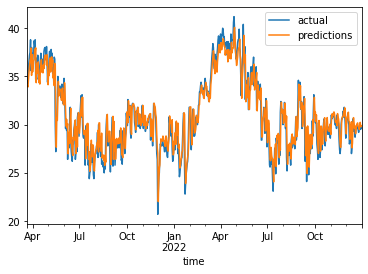

In [21]:
combined.plot()

In [22]:
reg.coef_

array([ 8.60159826e-01, -2.41954216e-02,  4.02620495e-02, -2.01995709e-04,
       -1.51228951e-04, -1.04817395e-02, -1.60803795e-03])

In [23]:
import pickle
pickle.dump(reg, open('rr_model.pkl','wb'))